In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading file
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine (1).csv


# **Task 1: Exploratory Data Analysis (EDA):**

In [3]:
# Reading the datset
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail() # Displays the last few rows of the dataframe

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.size # Displays the size of the dataframe

2492

In [6]:
df.shape # Displays the shape of the dataframe

(178, 14)

In [7]:
df.ndim # Dimensionality of the dataframe

2

In [8]:
df.info() # Displays the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.describe() # Statistical information

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
df.isnull().sum() # Missing values

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [11]:
df.duplicated().sum() # Duplicates

0

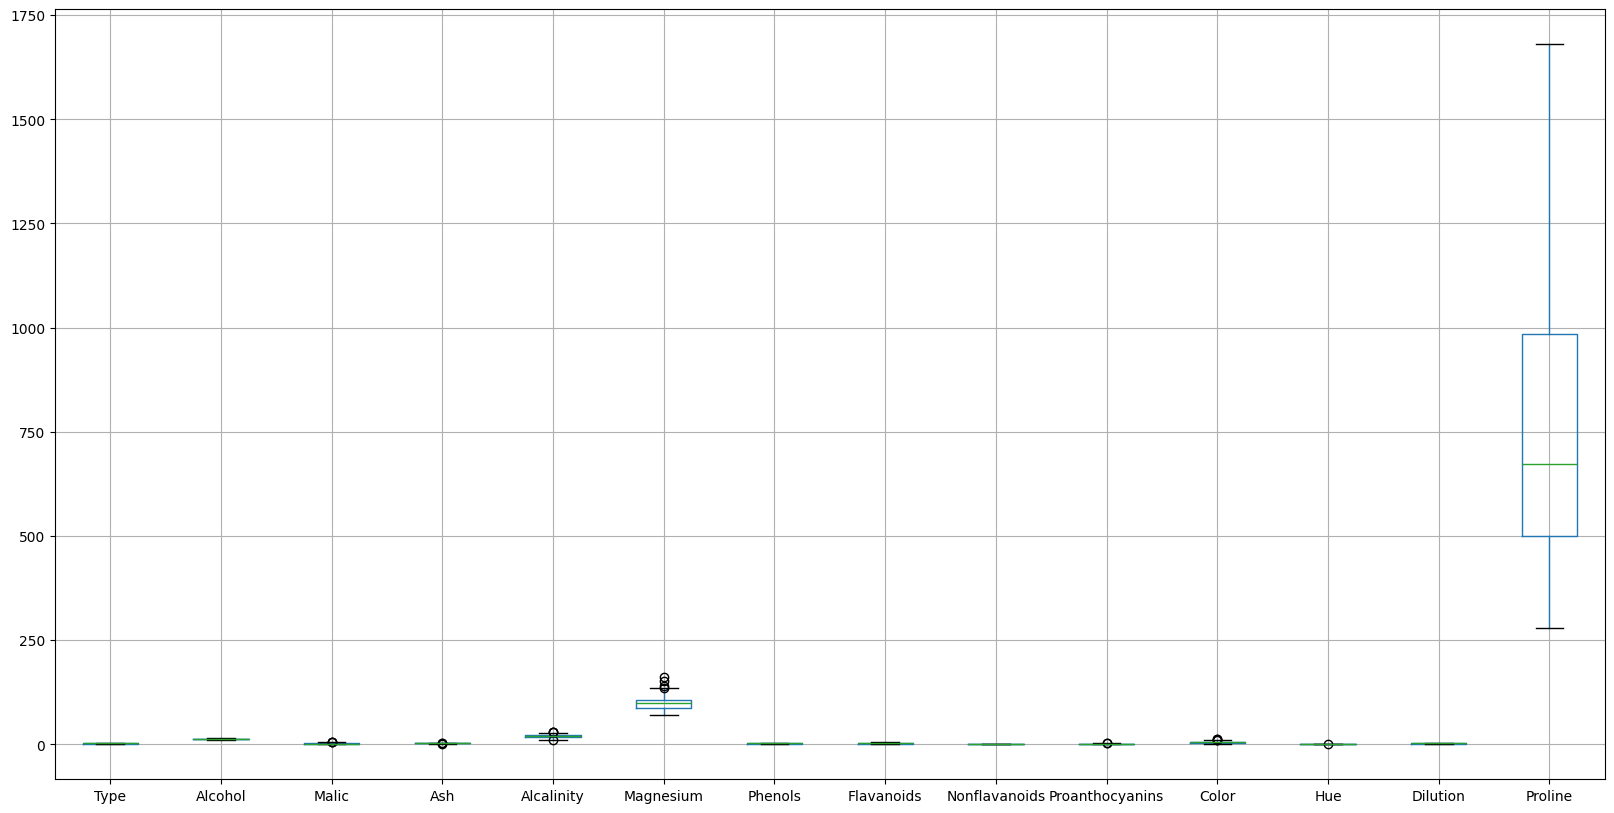

In [12]:
# Plot boxplot
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

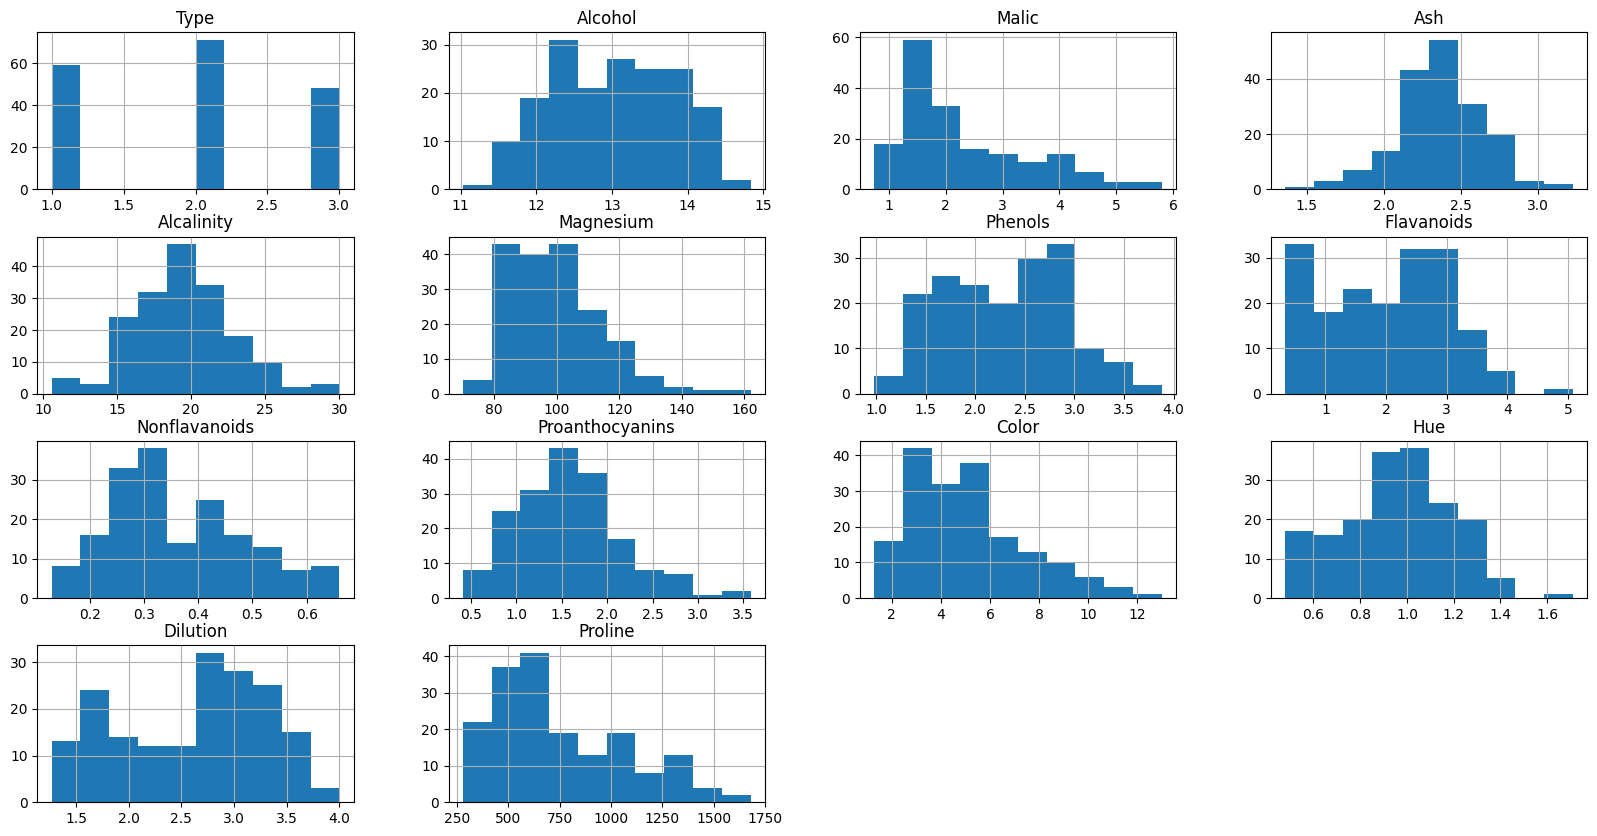

In [13]:
# Plots Histogram
df.hist(figsize=(20,10))
plt.show()

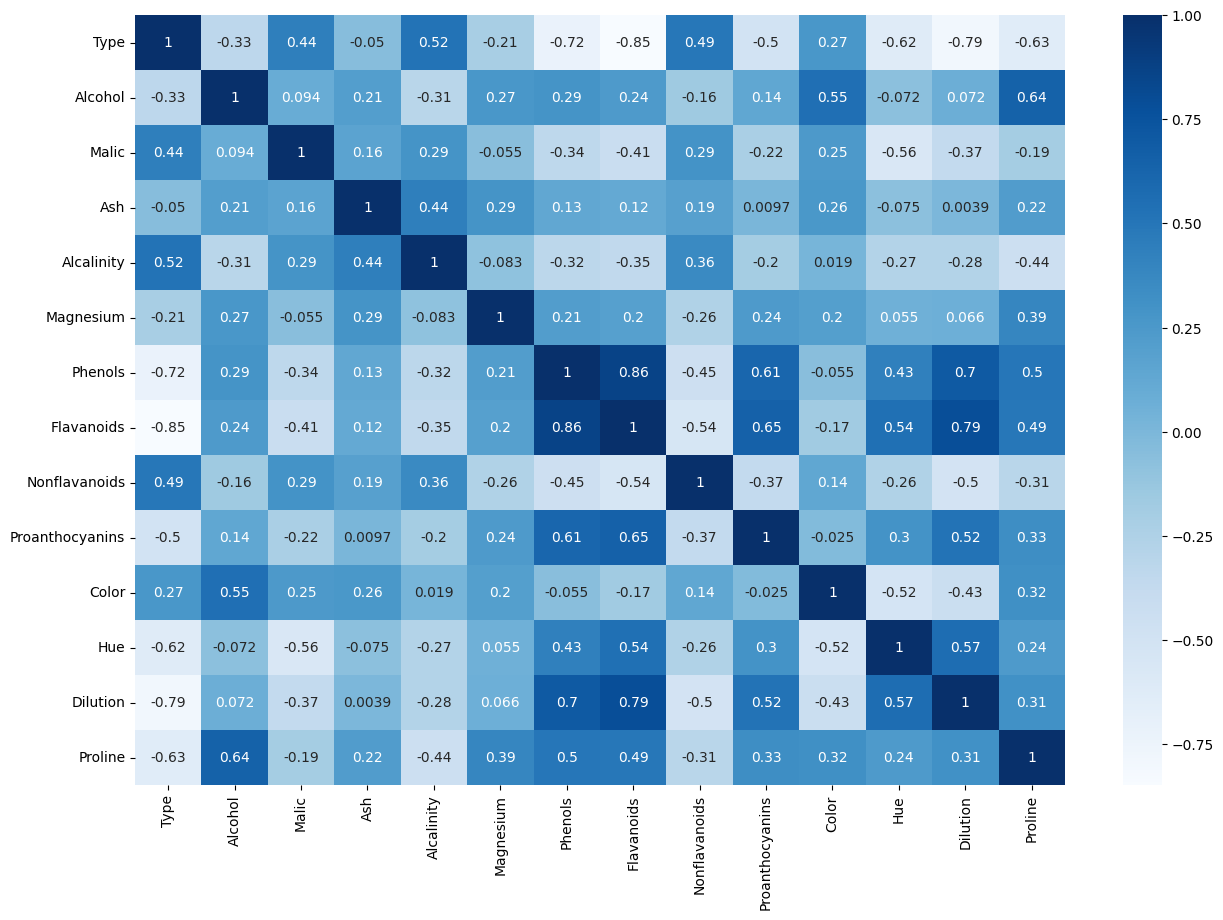

In [14]:
# Plots heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

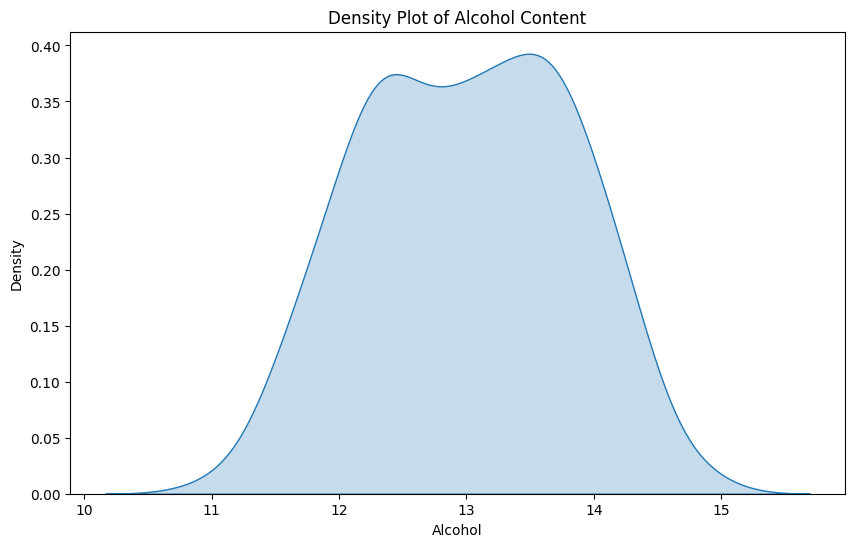

In [15]:
# Polts Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Alcohol'], shade=True)
plt.title('Density Plot of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

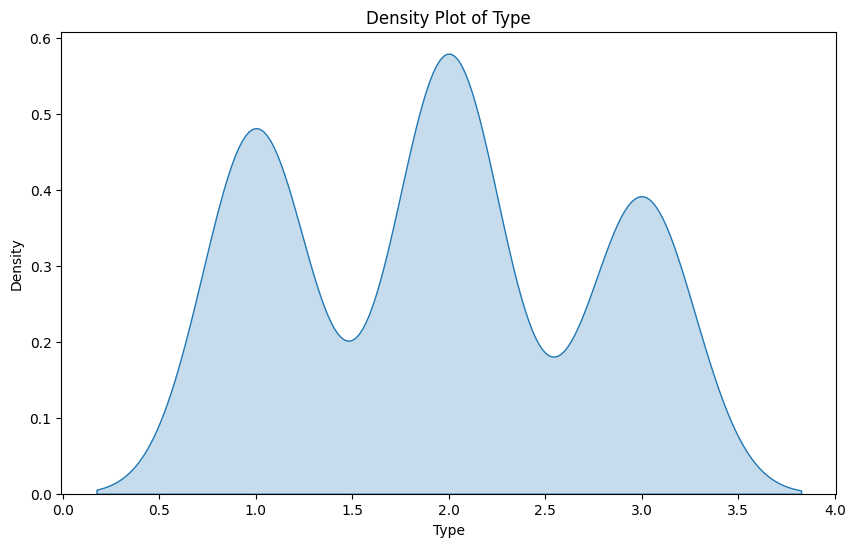

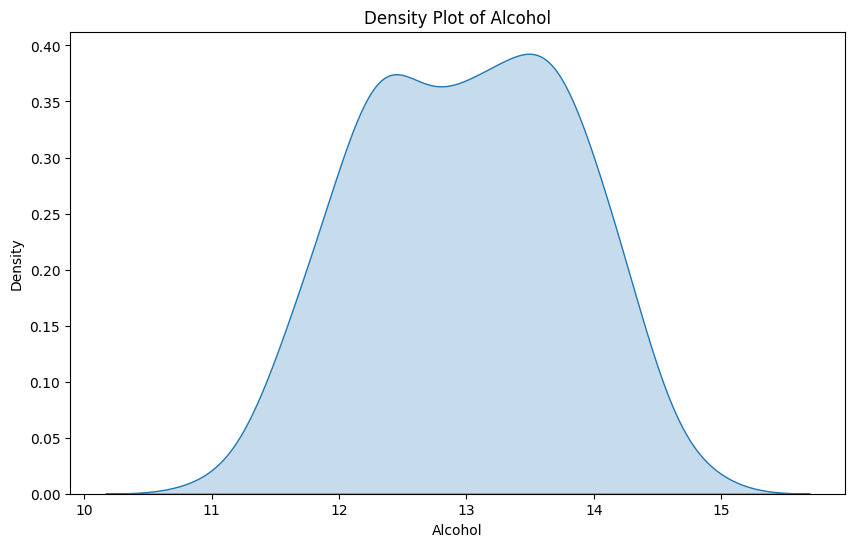

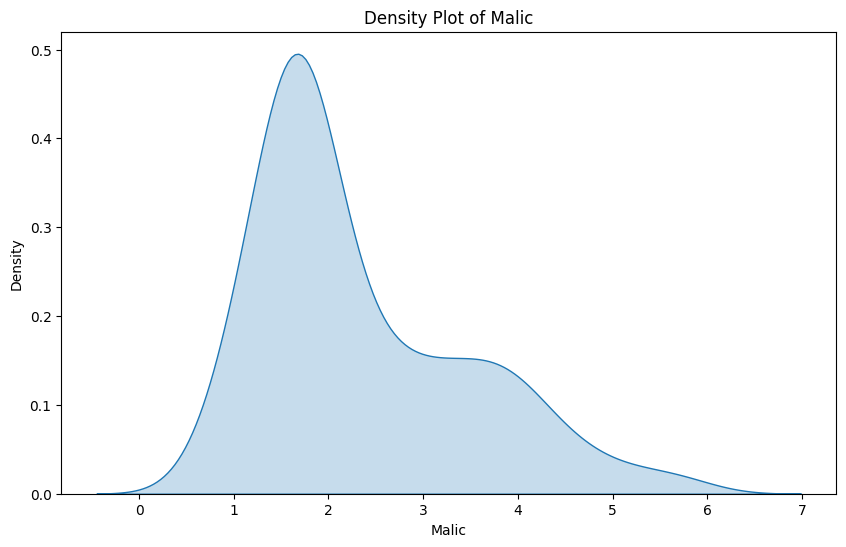

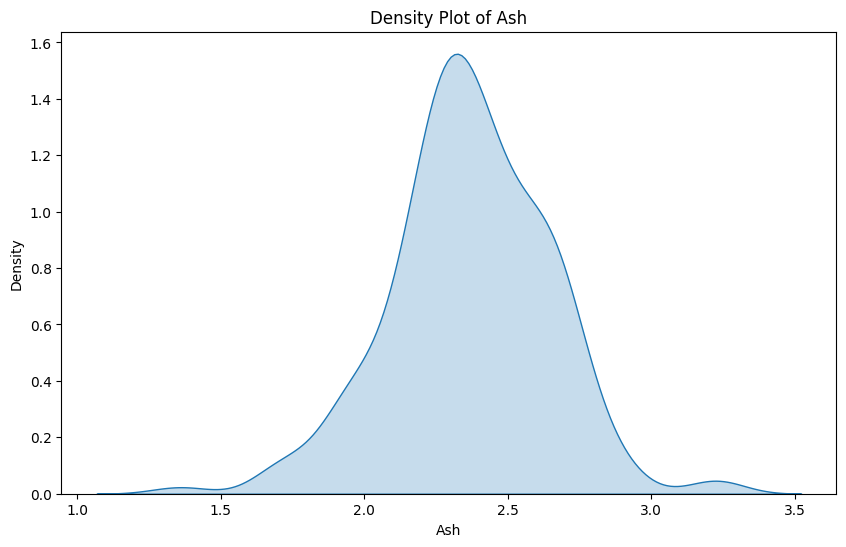

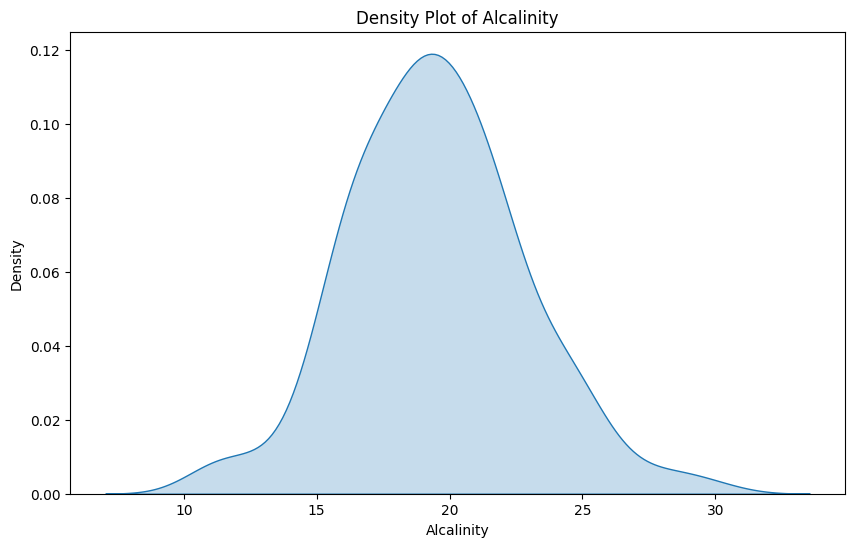

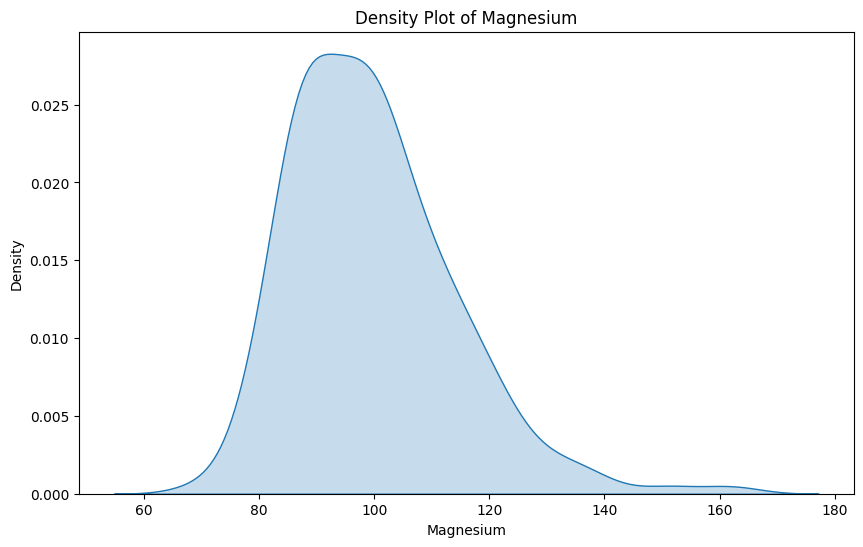

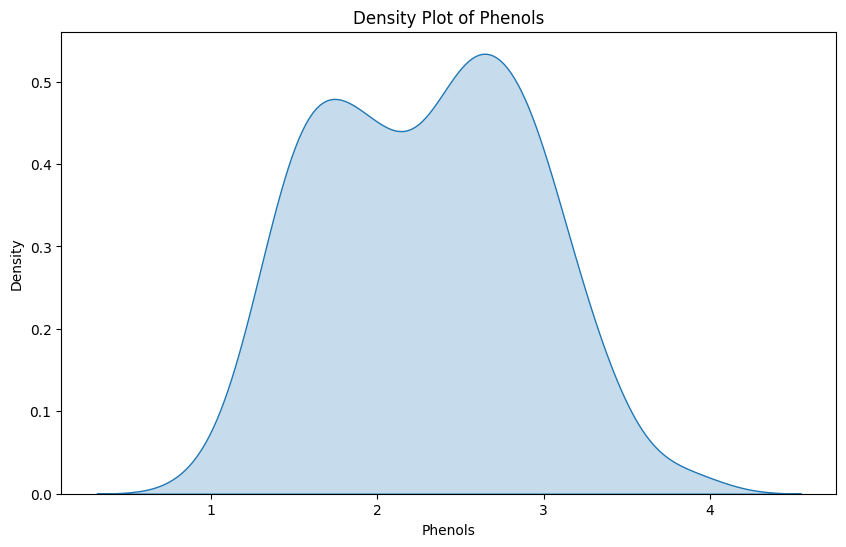

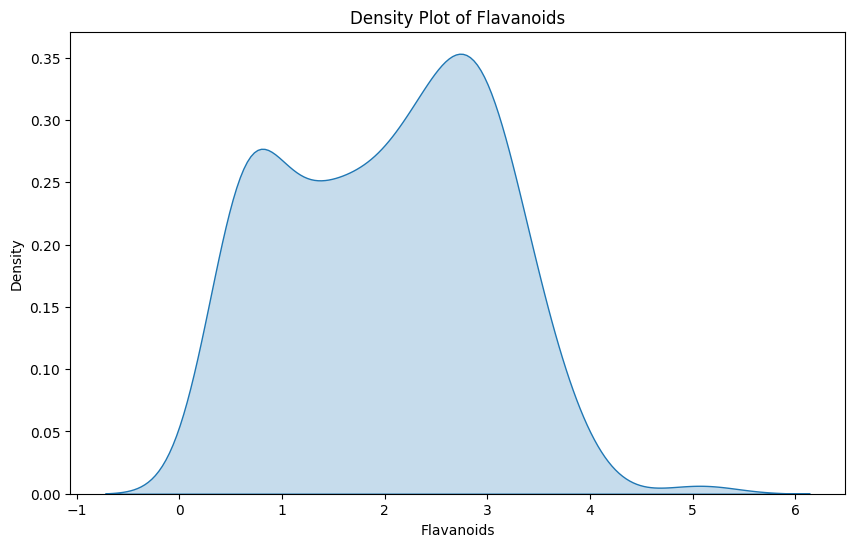

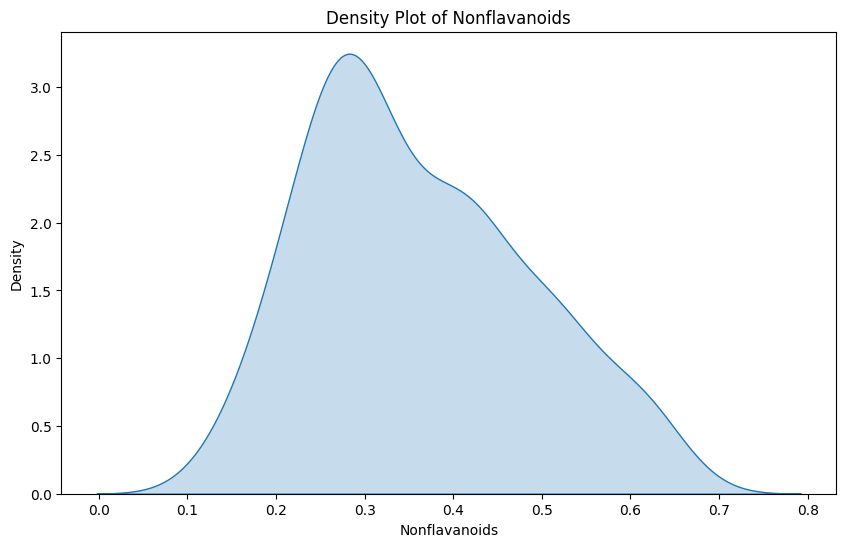

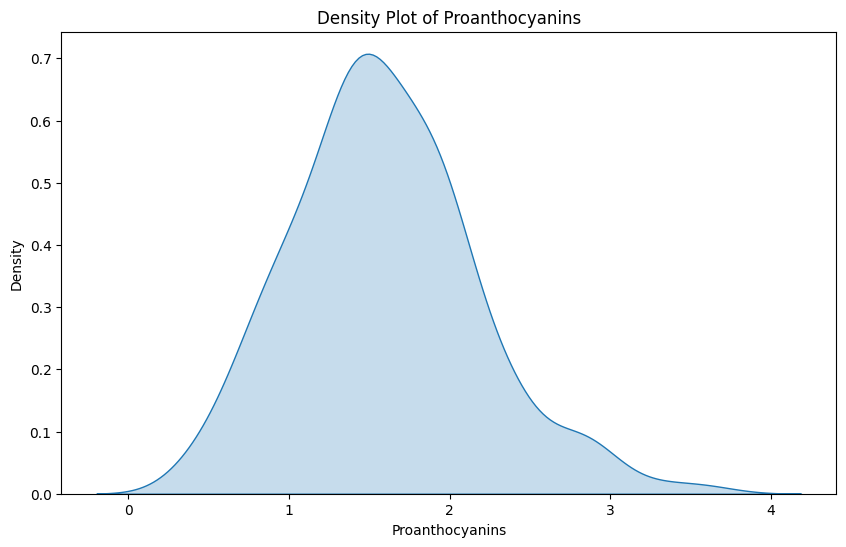

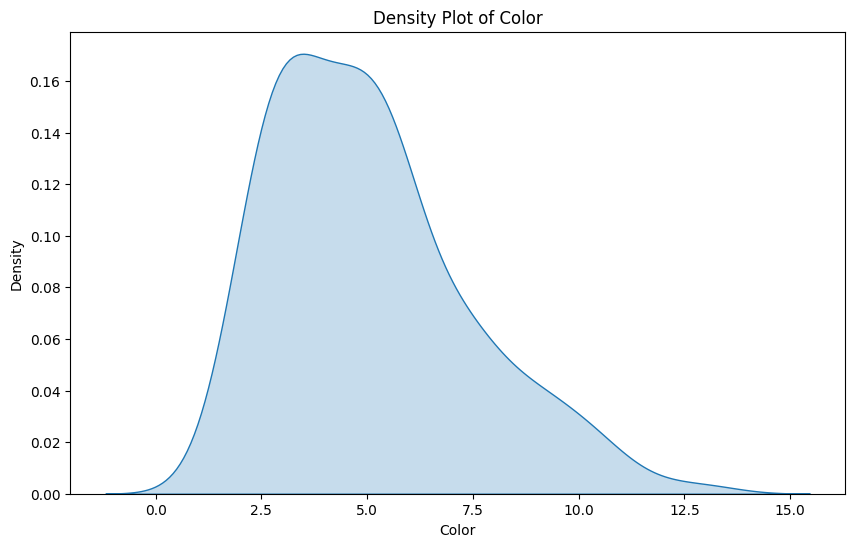

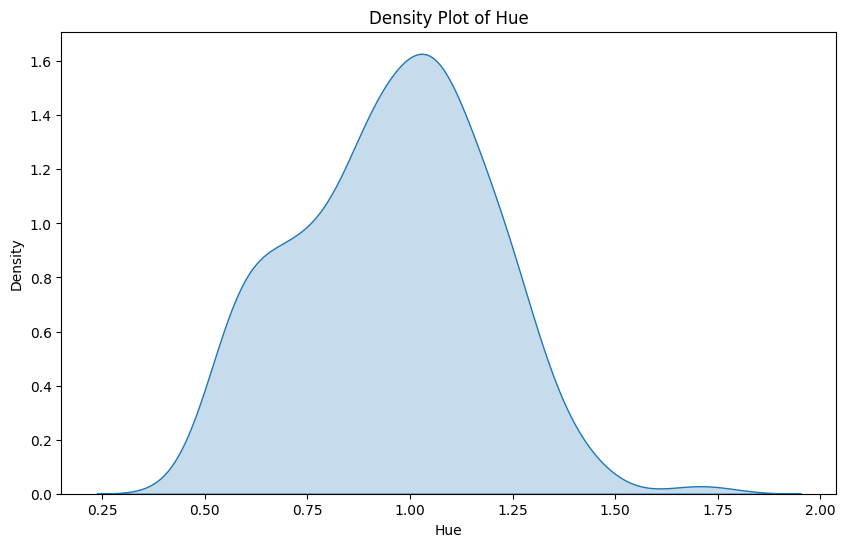

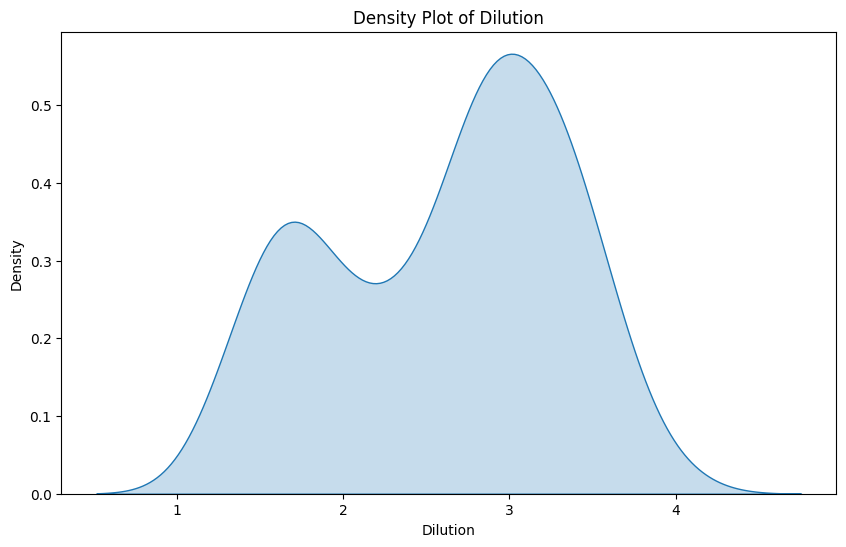

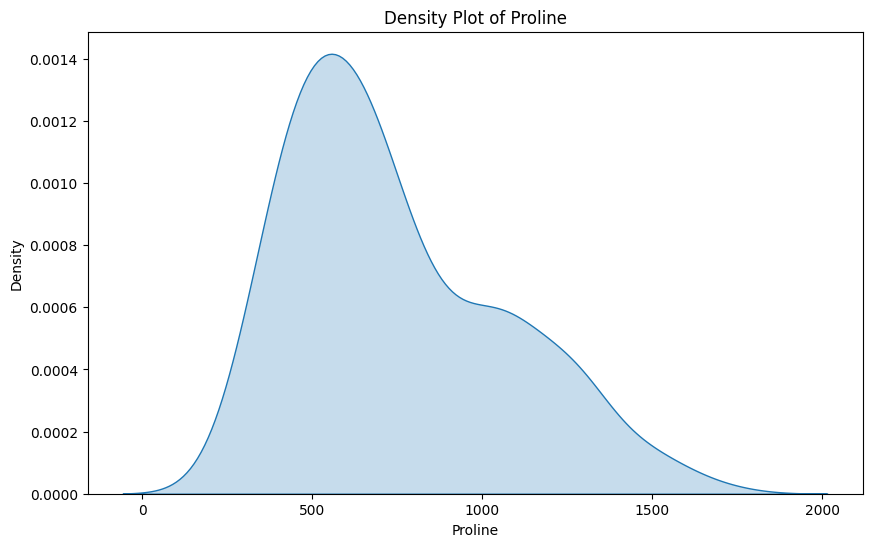

In [16]:
# plots dnsity plot for columns in the df
for col in df.columns:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(df[col], shade=True)
  plt.title(f'Density Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

# **Task 2: Dimensionality Reduction with PCA:**



In [17]:
features=df.drop('Type',axis=1) # Feature variable

In [18]:
# Applying scaling for numerical columns
std=StandardScaler()
df_std=std.fit_transform(features)

In [19]:
# Pca
pca=PCA()
df_pca=pca.fit_transform(df_std)

In [20]:
# Calculate explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

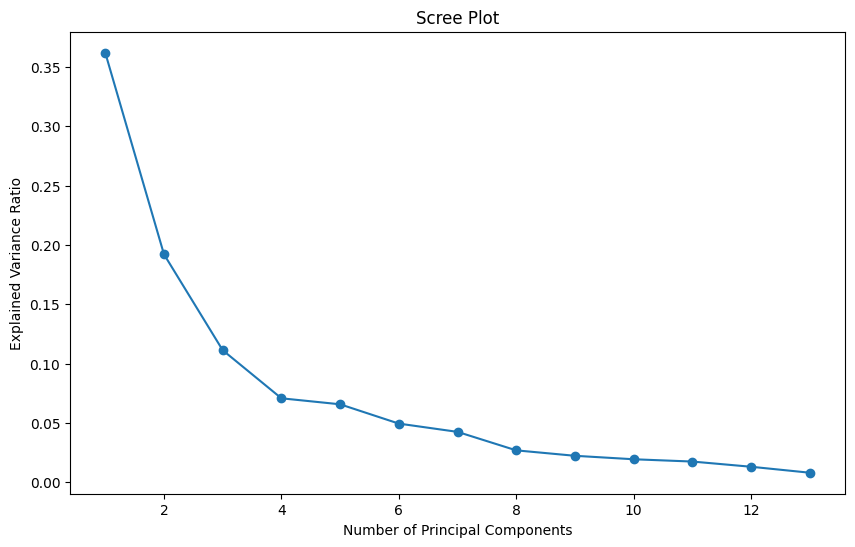

In [21]:
# Scree plot for visualization:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

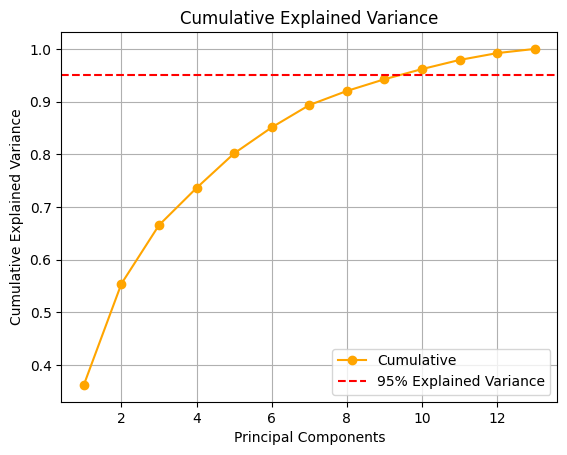

In [22]:
# Cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', label='Cumulative')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()


In [23]:
# Transform the dataset using the first 7 principal components
pca_optimal = PCA(n_components=7)
df_pca_reduced = pca_optimal.fit_transform(df_pca)

In [24]:
# Shape of the transformed dataset
df_pca_reduced.shape

(178, 7)

# **Task 3: Clustering with Original Data:**

In [25]:
# Apply K-means clustering on the original dataset (scaled)
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(features)

In [26]:
# Evaluate clustering performance
silhouette_original = silhouette_score(features, labels_original)
davies_bouldin_original = davies_bouldin_score(features, labels_original)

In [27]:
# prints 'silhouette score' and 'davies bouldin index'
print(f"Silhouette Score: {silhouette_original}")
print(f"Davies-Bouldin Index: {davies_bouldin_original}")

Silhouette Score: 0.5595823478987215
Davies-Bouldin Index: 0.549557597464291


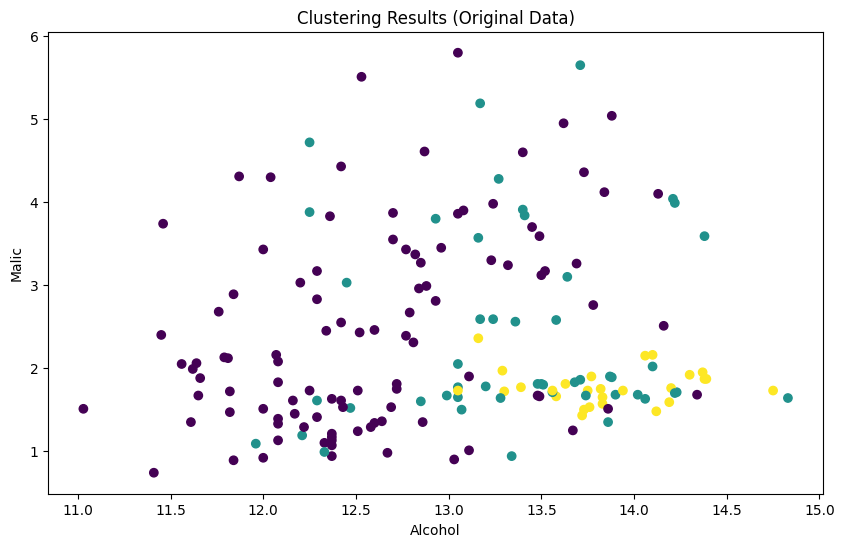

In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(features['Alcohol'], features['Malic'], c=labels_original, cmap='viridis')  # Replace with your feature columns
plt.title('Clustering Results (Original Data)')
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.show()

# **Task 4: Clustering with PCA Data:**

In [29]:
# Apply K-means clustering on the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

In [30]:
# Evaluate clustering performance on PCA data
silhouette_pca = silhouette_score(df_pca, labels_pca)
davies_bouldin_pca = davies_bouldin_score(df_pca, labels_pca)

In [31]:
print(f"Silhouette Score Pca: {silhouette_pca}")
print(f"Davies-Bouldin Index Pca: {davies_bouldin_pca}")

Silhouette Score Pca: 0.28485891918989864
Davies-Bouldin Index Pca: 1.3891879777181646


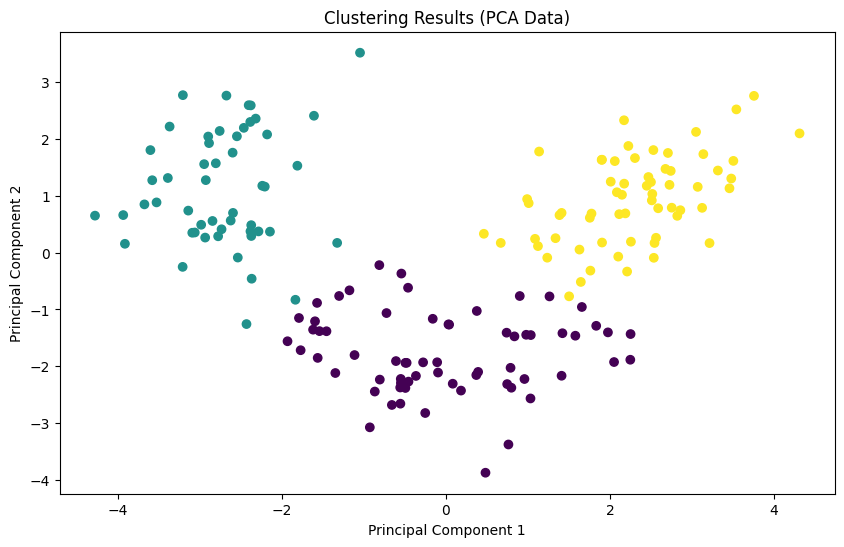

In [32]:
# Plots scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title('Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **Task 5: Comparison and Analysis:**


In [33]:
# Evaluation metrics
print(f"Silhouette Score (Original): {silhouette_original}")
print(f"Davies-Bouldin Index (Original): {davies_bouldin_original}")
print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA): {davies_bouldin_pca}")

Silhouette Score (Original): 0.5595823478987215
Davies-Bouldin Index (Original): 0.549557597464291
Silhouette Score (PCA): 0.28485891918989864
Davies-Bouldin Index (PCA): 1.3891879777181646


**Silhouette Score:** Clustering on the original dataset yielded a significantly higher silhouette score, indicating better-defined clusters with higher intra-cluster similarity and inter-cluster separation.

**Davies–Bouldin Index:** The original dataset also performed better, with a lower index value that suggests tighter, more cohesive clusters.

**2. Observed Similarities and Differences**

**Similarities:**

Both datasets were clustered into 3 groups, aligning with the likely 3 wine classes represented by the Type column in the dataset.

**Differences:**

Clusters from the original dataset are more distinct, as evidenced by the metrics.

Clusters from the PCA-transformed dataset showed reduced separation, suggesting that some important discriminatory features may have been lost during dimensionality reduction.

**3. Impact of Dimensionality Reduction on Clustering Performance**

PCA reduces the dimensionality of the data by projecting it onto a smaller set of uncorrelated principal components. While this simplifies the data:

* It may omit subtle, feature-specific information that contributes to cluster separation.
* In this case, the PCA-transformed dataset explained 95% of the variance, but the remaining 5% variance could have contributed significantly to clustering accuracy.

The reduced dimensionality might have caused overlapping of clusters in the reduced space, as seen from the poorer clustering metrics.

# **Task 6: Conclusion and Insights**


**Key Findings**

1. Clustering on the original dataset:

Produced better-defined clusters with higher silhouette scores (0.5596) and lower Davies–Bouldin indices (0.5496), indicating strong intra-cluster similarity and inter-cluster separation.

Retained the original feature relationships, allowing for more accurate clustering.
2. Clustering on PCA-Transformed Dataset:

Resulted in less distinct clusters, with a lower silhouette score (0.2849) and higher Davies–Bouldin index (1.3892).

Reduced dimensionality simplified the dataset but potentially lost crucial discriminative information.
3. Impact of Dimensionality Reduction:

PCA retained 95% of the original variance but reduced the clustering performance.

This highlights that even small amounts of unexplained variance can have a noticeable effect in tasks requiring precise separability.

PCA benefits computational efficiency but may compromise clustering quality when feature-specific relationships are critical.